<a href="https://colab.research.google.com/github/TheLiss/mlcourse_notebooks/blob/main/mlcourse_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [ ]:
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

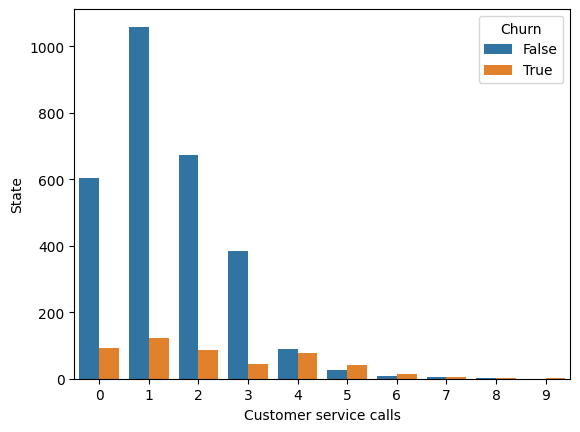

In [ ]:
churn_rate = df.groupby(['Customer service calls', 'Churn']).agg({'State': 'count'}).reset_index()
fig = sns.barplot(churn_rate, x='Customer service calls', y='State', hue='Churn')
fig.set_yscale('linear')

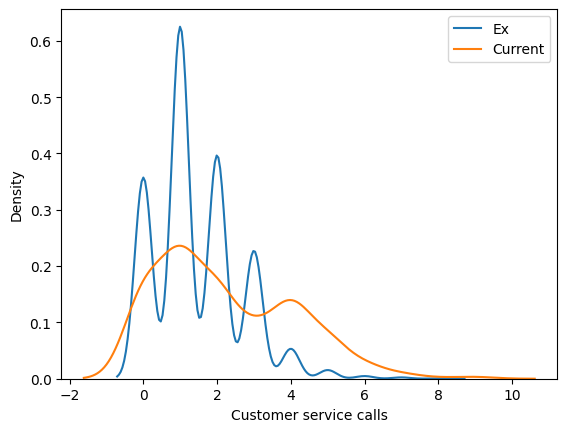

In [ ]:
sns.kdeplot(data=df[df['Churn']==False]['Customer service calls'], label='Ex')
sns.kdeplot(data=df[df['Churn']==True]['Customer service calls'], label='Current')
plt.legend()
plt.show()

In [ ]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [ ]:
loyal_calls = df[df['Churn'] == False]['Customer service calls'].values
churn_calls= df[df['Churn'] == True]['Customer service calls'].values

loyal_mean_scores = [np.mean(sample)
                       for sample in get_bootstrap_samples(loyal_calls, 1000)]
churn_mean_scores = [np.mean(sample)
                       for sample in get_bootstrap_samples(churn_calls, 1000)]
print(np.percentile(loyal_mean_scores, 0.05), np.percentile(loyal_mean_scores, 0.95))
print(np.percentile(churn_mean_scores, 0.05), np.percentile(churn_mean_scores, 0.95))

1.3880656140350878 1.399298245614035
1.9596076604554866 2.022656314699793


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
num_cols = [c for c in df.columns if df[c].dtype == 'int64']

In [ ]:
X, y = df[num_cols], np.asarray(df["Churn"],dtype='int8')

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

In [ ]:
results = cross_val_score(rfc, X, y, cv=skf)

In [ ]:
print(results.mean())

0.8595868732300517


In [ ]:
train_acc = []
test_acc = []
trees_grid = [5, 7, 9, 11, 13, 15, 17, 19]
for tree in trees_grid:
  rfc = RandomForestClassifier(n_estimators=tree, oob_score=True)
  temp_train_acc = []
  temp_test_acc = []
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rfc.fit(X_train, y_train)
    temp_train_acc.append(rfc.score(X_train, y_train))
    temp_test_acc.append(rfc.score(X_test, y_test))
  train_acc.append(temp_train_acc)
  test_acc.append(temp_test_acc)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too fe

In [ ]:
np.asarray(train_acc).mean(axis=1)

array([0.97427225, 0.98094822, 0.9851484 , 0.98814906, 0.98957408,
       0.99227417, 0.99407439, 0.99399937])

In [ ]:
scores = pd.DataFrame([trees_grid, np.asarray(train_acc).mean(axis=1), np.asarray(test_acc).mean(axis=1)], index=['trees number', 'mean train acc', 'mean test acc']).T

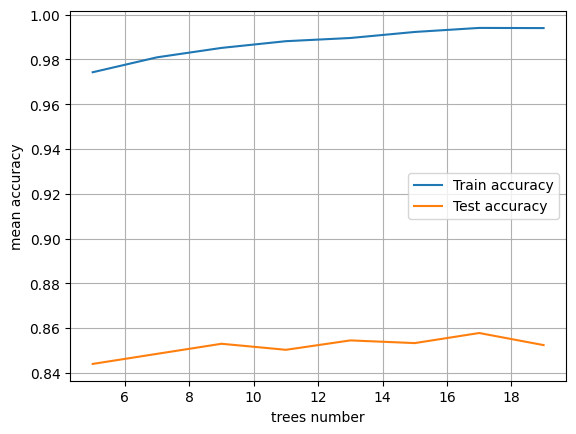

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(scores, x='trees number', y='mean train acc', label='Train accuracy')
sns.lineplot(scores, x='trees number', y='mean test acc', label='Test accuracy')
ax.grid()
ax.set_ylabel('mean accuracy')
ax.legend()

In [ ]:
max_depth_grid = np.arange(3,26,2)

In [ ]:
train_acc = []
test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
for depth in max_depth_grid:
  rfc = RandomForestClassifier(max_depth=depth, oob_score=True)
  temp_train_acc = []
  temp_test_acc = []
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rfc.fit(X_train, y_train)
    temp_train_acc.append(rfc.score(X_train, y_train))
    temp_test_acc.append(rfc.score(X_test, y_test))
  train_acc.append(temp_train_acc)
  test_acc.append(temp_test_acc)

In [ ]:
scores = pd.DataFrame([max_depth_grid, np.asarray(train_acc).mean(axis=1), np.asarray(test_acc).mean(axis=1)], index=['max_depth', 'train acc', 'test acc']).T

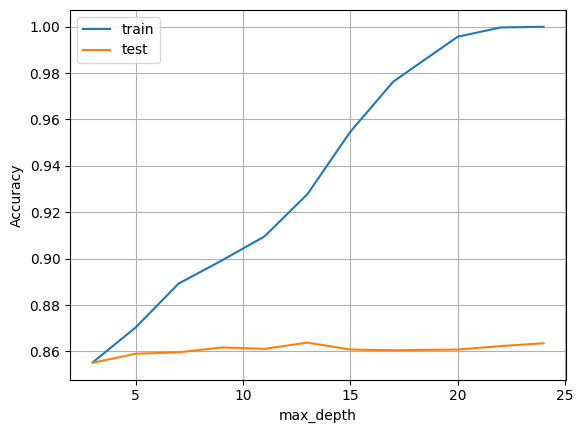

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(scores, x='max_depth', y='train acc', label='train')
sns.lineplot(scores, x='max_depth', y='test acc', label='test')
ax.grid()
ax.set_ylabel('Accuracy')
fig.show()

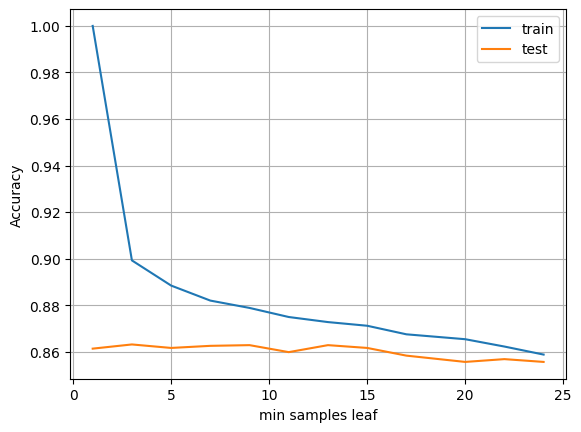

In [ ]:
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
train_acc = []
test_acc = []
for x in min_samples_leaf_grid:
  rfc = RandomForestClassifier(min_samples_leaf=x, oob_score=True)
  temp_train_acc = []
  temp_test_acc = []
  for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rfc.fit(X_train, y_train)
    temp_train_acc.append(rfc.score(X_train, y_train))
    temp_test_acc.append(rfc.score(X_test, y_test))
  train_acc.append(temp_train_acc)
  test_acc.append(temp_test_acc)

scores = pd.DataFrame([min_samples_leaf_grid, np.asarray(train_acc).mean(axis=1), np.asarray(test_acc).mean(axis=1)], index=['min samples leaf', 'train acc', 'test acc']).T

fig, ax = plt.subplots()
sns.lineplot(scores, x='min samples leaf', y='train acc', label='train')
sns.lineplot(scores, x='min samples leaf', y='test acc', label='test')
ax.grid()
ax.set_ylabel('Accuracy')
fig.show()

In [ ]:
hostel_data = pd.read_csv(DATA_PATH + "hostel_factors.csv")

In [ ]:
hostel_data.head()

,hostel,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,rating
0,hostel1,0.675000,0.100000,0.300000,0.875000,0.250000,0.425000,0.350000,0.725000,0.400000,0.275000,9.0
1,hostel2,0.500000,0.000000,0.058824,0.573529,0.117647,0.382353,0.000000,0.161765,0.308824,0.000000,8.3
2,hostel3,0.520833,0.041667,0.020833,0.666667,0.229167,0.437500,0.270833,0.250000,0.395833,0.270833,8.6
3,hostel4,0.692308,0.038462,0.038462,0.346154,0.076923,0.307692,0.500000,0.115385,0.153846,0.269231,7.6
4,hostel5,0.620690,0.000000,0.000000,0.517241,0.172414,0.344828,0.172414,0.379310,0.103448,0.310345,8.7


In [ ]:
features = {"f1":u"Персонал",
"f2":u"Бронирование хостела ",
"f3":u"Заезд в хостел и выезд из хостела",
"f4":u"Состояние комнаты",
"f5":u"Состояние общей кухни",
"f6":u"Состояние общего пространства",
"f7":u"Дополнительные услуги",
"f8":u"Общие условия и удобства",
"f9":u"Цена/качество",
"f10":u"ССЦ"}

In [ ]:
hostel_data.rename(features, axis=1, inplace=True)

In [ ]:
hostel_data.head()

,hostel,Персонал,Бронирование хостела,Заезд в хостел и выезд из хостела,Состояние комнаты,Состояние общей кухни,Состояние общего пространства,Дополнительные услуги,Общие условия и удобства,Цена/качество,ССЦ,rating
0,hostel1,0.675000,0.100000,0.300000,0.875000,0.250000,0.425000,0.350000,0.725000,0.400000,0.275000,9.0
1,hostel2,0.500000,0.000000,0.058824,0.573529,0.117647,0.382353,0.000000,0.161765,0.308824,0.000000,8.3
2,hostel3,0.520833,0.041667,0.020833,0.666667,0.229167,0.437500,0.270833,0.250000,0.395833,0.270833,8.6
3,hostel4,0.692308,0.038462,0.038462,0.346154,0.076923,0.307692,0.500000,0.115385,0.153846,0.269231,7.6
4,hostel5,0.620690,0.000000,0.000000,0.517241,0.172414,0.344828,0.172414,0.379310,0.103448,0.310345,8.7


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc = RandomForestRegressor(n_estimators=1000, n_jobs=-1, verbose=True, max_features=10)

In [ ]:
X = hostel_data.drop(['hostel', 'rating'], axis=1)
y = hostel_data['rating']

In [ ]:
rfc.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.8s finished


RandomForestRegressor(max_features=10, n_estimators=1000, n_jobs=-1,
                      verbose=True)

In [ ]:
feature_importance = pd.DataFrame(rfc.feature_importances_, index=X.columns).sort_values(0, ascending=False).reset_index()
feature_importance.columns = ['feature', 'importance']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Персонал'),
  Text(1, 0, 'Цена/качество'),
  Text(2, 0, 'Дополнительные услуги'),
  Text(3, 0, 'ССЦ'),
  Text(4, 0, 'Состояние общего пространства'),
  Text(5, 0, 'Общие условия и удобства'),
  Text(6, 0, 'Состояние общей кухни'),
  Text(7, 0, 'Заезд в хостел и выезд из хостела'),
  Text(8, 0, 'Бронирование хостела '),
  Text(9, 0, 'Состояние комнаты')])

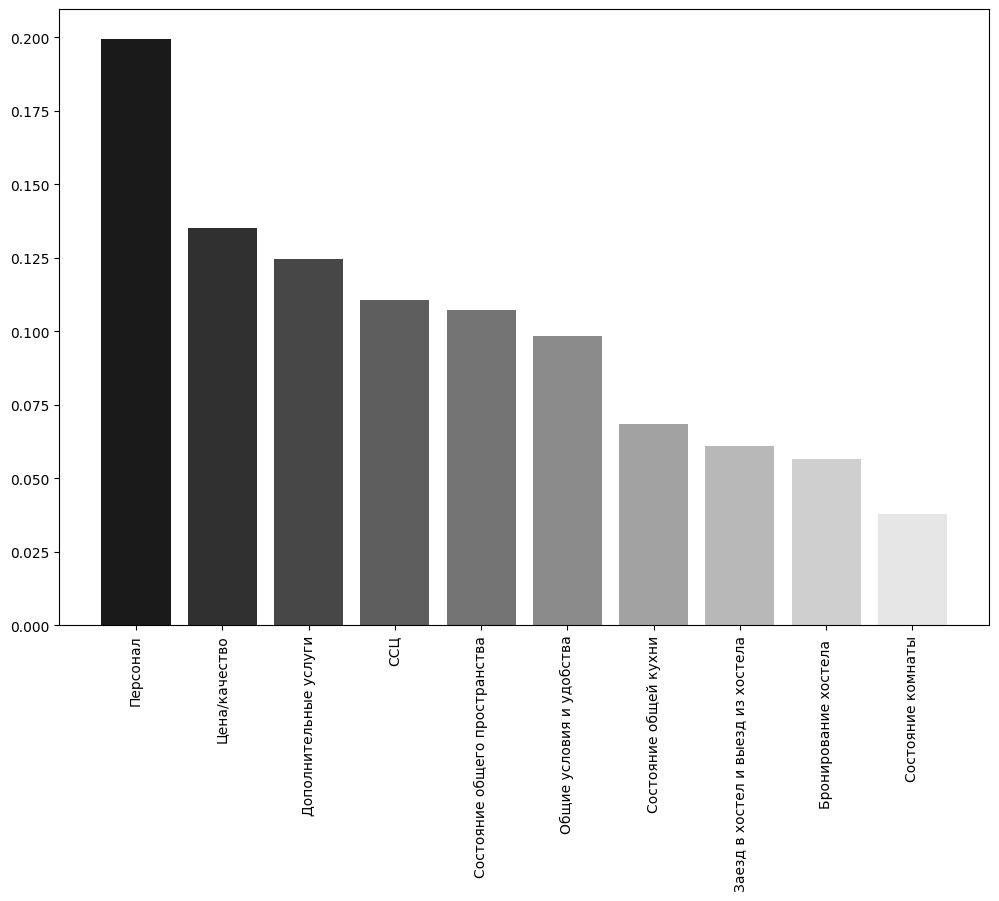

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x=feature_importance['feature'], height=feature_importance['importance'], color = np.array(list(map(str, np.linspace(0.1,0.9,10)))))
plt.xticks(rotation='vertical')

In [ ]:
[str(i/float(num_to_plot+1))
               for i in range(num_to_plot)]

['0.0',
 '0.09090909090909091',
 '0.18181818181818182',
 '0.2727272727272727',
 '0.36363636363636365',
 '0.45454545454545453',
 '0.5454545454545454',
 '0.6363636363636364',
 '0.7272727272727273',
 '0.8181818181818182']